# Grocery Store Projet :
## Introduction
In this project we will try to create a model that predict whether or not a grocery item is discounted or not.

This dataset comprises information gathered from Costco's online marketplace, focusing on various grocery items available for purchase. It contains the following features:

- "Sub Category": Classifies grocery items into subcategories for easier analysis and organization.
- "Price": Monetary value of the grocery item, indicating its cost or retail price in the specified currency.
- "Discount": Any discounts or promotional offers applicable to the respective grocery item, providing insights into pricing strategies.
- "Rating": Customer satisfaction or product quality based on user ratings, offering a measure of the overall perceived value of the grocery item.
- "Title": Name or title of the grocery item, providing a concise identifier for easy reference and understanding.
- "Currency": Currency in which the prices are denominated, facilitating proper interpretation and comparison of monetary values.
- "Feature": Includes features or characteristics of the grocery item, offering additional information about its unique attributes or selling points.
- "Product Description": Provides a detailed textual description of the grocery item, offering comprehensive information about its specifications, uses, and other relevant details. 

## Data Importation and Exploration

In [174]:
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline
import re
from nltk.stem import WordNetLemmatizer
import math
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# Import data
df = pd.read_csv('GroceryDataset.csv')
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
...,...,...,...,...,...,...,...,...
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


## Data Exploring

In [175]:
# DataFrame's structure 
df.dtypes

Sub Category           object
Price                  object
Discount               object
Rating                 object
Title                  object
Currency               object
Feature                object
Product Description    object
dtype: object

In [176]:
# Missing values 
df.isnull().sum()

Sub Category              0
Price                     3
Discount                  0
Rating                 1075
Title                     0
Currency                  5
Feature                  18
Product Description      42
dtype: int64

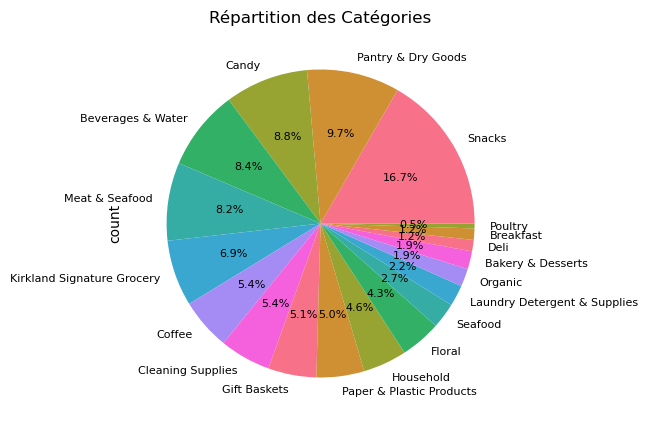

In [177]:
# Diagramme à secteurs pour la répartition des catégories avec la palette 'rocket'
plt.figure(figsize=(5, 5))
df['Sub Category'].value_counts().plot.pie(autopct=lambda p: '{:.1f}%'.format(p), colors=sns.color_palette("husl", 8), textprops={'fontsize': 8})
plt.title('Répartition des Catégories')
plt.show()

In [178]:
# Unique Value Inspection for Price column
df['Price'].unique()

array(['$56.99 ', '$159.99 ', '$44.99 ', '$39.99 ', '$59.99 ', '$74.99 ',
       '$29.99 ', '$62.99 ', '$299.99 ', '$54.99 ', '$89.99 ', '$49.99 ',
       '$99.99 ', '$24.99 ', '$72.99 ', '$119.99 ', '$109.99 ', '$34.99 ',
       '$27.99 ', '$21.99 ', '$20.99 ', '$19.99 ', '$439.99 ', '$9.99 ',
       '$14.99 ', '$18.99 ', '$21.49 ', '$17.99 ', '$23.99 ', '$4.99 ',
       '$12.99 ', '$32.99 ', '$13.79 ', '$23.49 ', '$22.99 ', '$8.99 ',
       '$15.99 ', '$28.99 ', '$16.49 ', '$549.99 ', '$17.49 ', '$25.99 ',
       '$11.69 ', '$69.99 ', '$21.79 ', '$37.99 ', '$139.99 ', '$41.99 ',
       '$18.49 ', '$16.99 ', '$36.99 ', '$10.99 ', '$61.99 ', '$17.59 ',
       '$11.99 ', '$24.49 ', '$10.49 ', '$9.69 ', '$8.19 ', '$9.49 ',
       '$12.49 ', '$12.69 ', '$31.99 ', '$15.49 ', '$46.99 ', '$11.49 ',
       '$16.39 ', '$13.99 ', '$38.99 ', '$26.99 ', '$13.49 ', '$14.49 ',
       '$26.69 ', '$42.99 ', '$45.99 ', '$7.99 ', '$25.69 ', '$19.49 ',
       '$12.09 ', '$10.79 ', '$17.89 ', '$28.79 ', 

### Data Cleaning

In [179]:
def handle_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('$', '').replace(',', '').strip()
        price_str = price_str.replace('through', '').replace('$', '').replace(',', '').strip()
    else:
        return price_str

    if '-' in price_str:
        low, high = price_str.split('-')
        return (float(low) + float(high)) / 2
    else:
        return float(price_str)
# Cleaning Price column
df['Price'] = df['Price'].apply(handle_price)
# Verification
df['Price'].unique()

array([  56.99,  159.99,   44.99,   39.99,   59.99,   74.99,   29.99,
         62.99,  299.99,   54.99,   89.99,   49.99,   99.99,   24.99,
         72.99,  119.99,  109.99,   34.99,   27.99,   21.99,   20.99,
         19.99,  439.99,    9.99,   14.99,   18.99,   21.49,   17.99,
         23.99,    4.99,   12.99,   32.99,   13.79,   23.49,   22.99,
          8.99,   15.99,   28.99,   16.49,  549.99,   17.49,   25.99,
         11.69,   69.99,   21.79,   37.99,  139.99,   41.99,   18.49,
         16.99,   36.99,   10.99,   61.99,   17.59,   11.99,   24.49,
         10.49,    9.69,    8.19,    9.49,   12.49,   12.69,   31.99,
         15.49,   46.99,   11.49,   16.39,   13.99,   38.99,   26.99,
         13.49,   14.49,   26.69,   42.99,   45.99,    7.99,   25.69,
         19.49,   12.09,   10.79,   17.89,   28.79,   84.99,   58.49,
         20.89,    9.79,   29.89,  199.99,   47.99,   18.39,   43.99,
         33.99,   28.49,   10.29,   35.99,   48.99,   29.69,    6.59,
        149.99,  649

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sub Category         1757 non-null   object 
 1   Price                1754 non-null   float64
 2   Discount             1757 non-null   object 
 3   Rating               682 non-null    object 
 4   Title                1757 non-null   object 
 5   Currency             1752 non-null   object 
 6   Feature              1739 non-null   object 
 7   Product Description  1715 non-null   object 
dtypes: float64(1), object(7)
memory usage: 109.9+ KB


## Exploratory Data Analysis

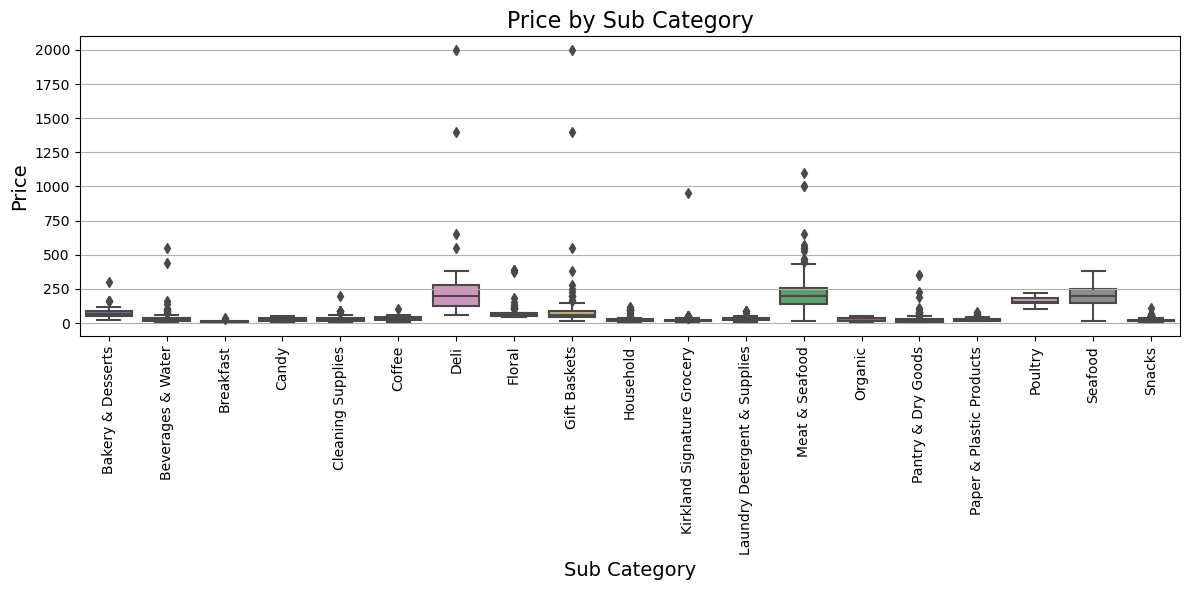

In [181]:
#dispersion price par subcategory
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub Category', y='Price', data=df, palette='deep')

plt.xticks(rotation=90)
plt.xlabel('Sub Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price by Sub Category', fontsize=16)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [182]:
print('la colone Price contient ',df['Price'].count(),
      ' valeurs non nulles et que ',df['Price'].isnull().sum(),' valeurs nulles')

la colone Price contient  1754  valeurs non nulles et que  3  valeurs nulles


In [183]:
# Supprimer les lignes où la colonne 'Price' a une valeur nulle
df.dropna(subset=['Price'], inplace=True)

In [184]:
#Extract Numeric Ratings: 
df['Numeric Rating'] = df['Rating'].str.extract('(\d+\.\d+|\d+)')
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description,Numeric Rating
0,Bakery & Desserts,56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,4.3
1,Bakery & Desserts,159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",5
2,Bakery & Desserts,44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,4.1
3,Bakery & Desserts,39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,4.7
4,Bakery & Desserts,59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,4.5
...,...,...,...,...,...,...,...,...,...
1752,Snacks,23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...,NaN
1753,Snacks,49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags,NaN
1754,Snacks,22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...,NaN
1755,Snacks,17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...,NaN


In [185]:
df['Numeric Rating'].info()

<class 'pandas.core.series.Series'>
Index: 1754 entries, 0 to 1756
Series name: Numeric Rating
Non-Null Count  Dtype 
--------------  ----- 
615 non-null    object
dtypes: object(1)
memory usage: 27.4+ KB


In [186]:
# Convertir la colonne 'Numeric Rating' en valeurs numériques et les placer dans une nouvelle colonne 'Rating'
df['Rating'] = pd.to_numeric(df['Numeric Rating'], errors='coerce')

# Supprimer la colonne 'Numeric Rating' d'origine
df.drop(columns=['Numeric Rating'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1754 entries, 0 to 1756
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sub Category         1754 non-null   object 
 1   Price                1754 non-null   float64
 2   Discount             1754 non-null   object 
 3   Rating               615 non-null    float64
 4   Title                1754 non-null   object 
 5   Currency             1752 non-null   object 
 6   Feature              1736 non-null   object 
 7   Product Description  1712 non-null   object 
dtypes: float64(2), object(6)
memory usage: 123.3+ KB


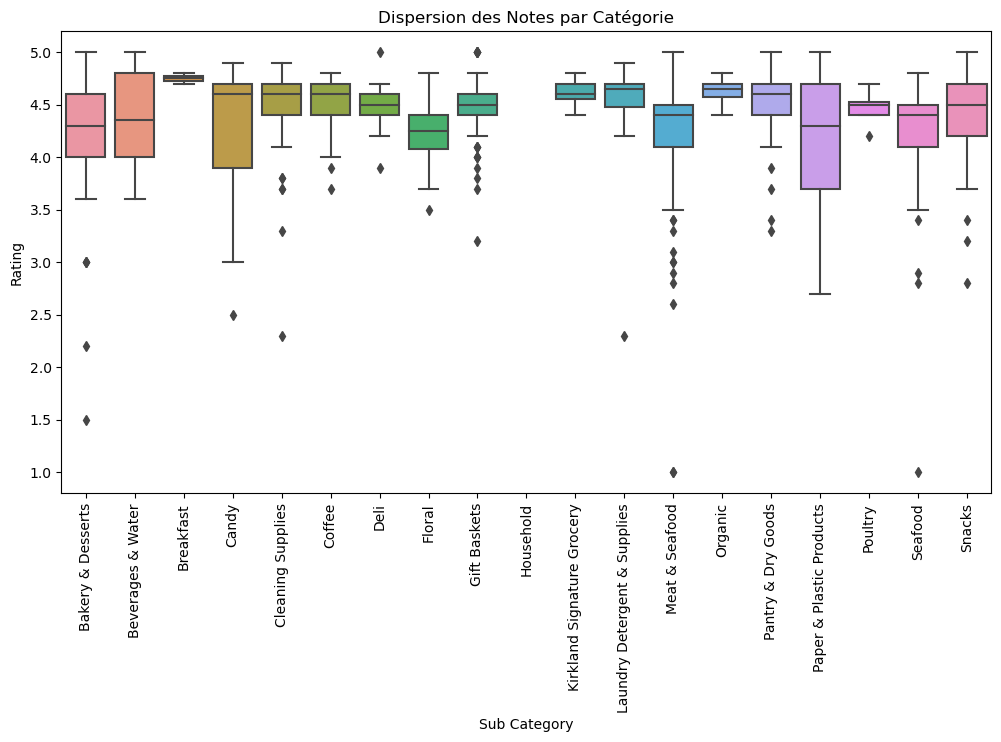

In [187]:
# Diagramme en boîte pour les notes par catégorie
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub Category', y='Rating', data=df)
plt.title('Dispersion des Notes par Catégorie')
plt.xticks(rotation=90)
plt.show()

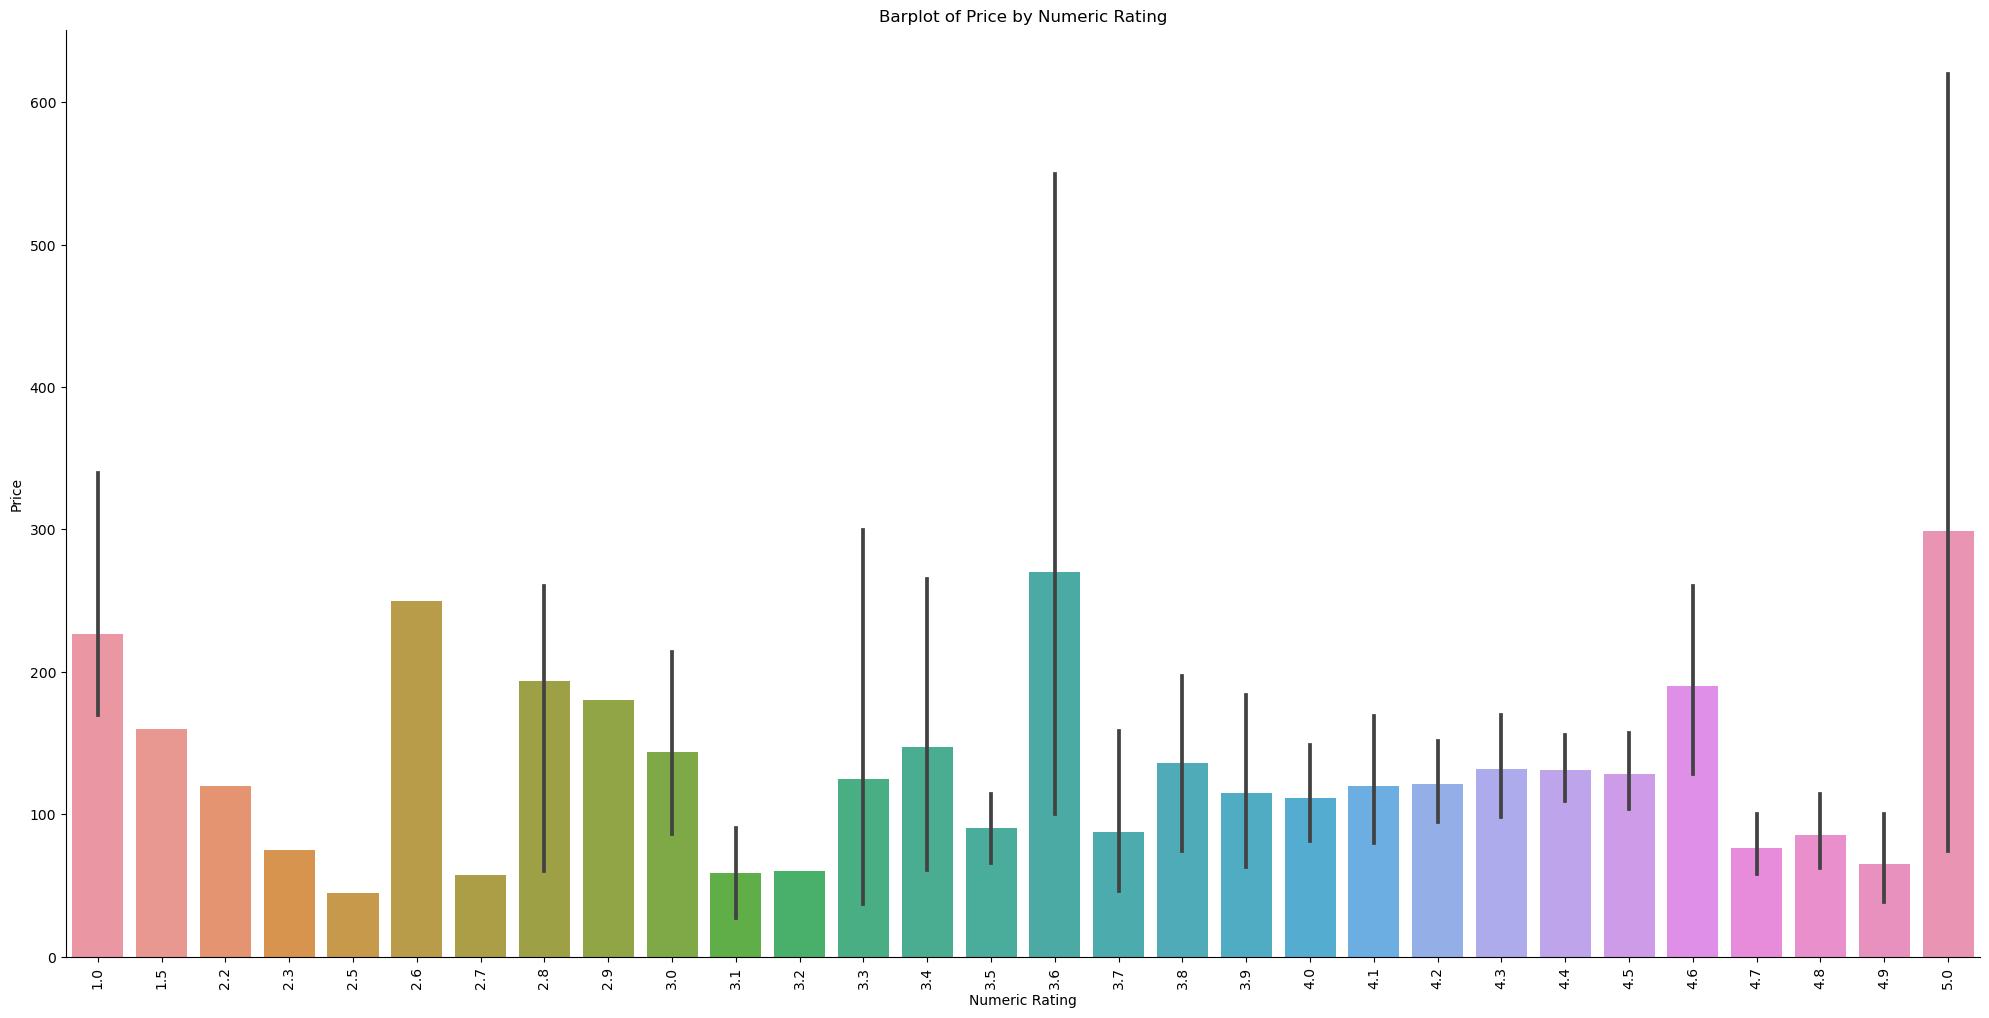

In [188]:
# Utilisation de sns.catplot pour créer un barplot
sns.catplot(x='Rating', y='Price', data=df, kind='bar', height=10, aspect=2)

# Ajout des labels et du titre
plt.xlabel('Numeric Rating')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.title('Barplot of Price by Numeric Rating')

# Affichage du catplot
plt.show()

In [189]:
df['Rating'].info()

<class 'pandas.core.series.Series'>
Index: 1754 entries, 0 to 1756
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
615 non-null    float64
dtypes: float64(1)
memory usage: 27.4 KB


In [190]:
print("Nombre de valeurs non nulles dans la colonne Numeric rating :", df['Rating'].count())
print("Nombre de valeurs nulles dans la colonne Numeric rating:", df['Rating'].isna().sum())

Nombre de valeurs non nulles dans la colonne Numeric rating : 615
Nombre de valeurs nulles dans la colonne Numeric rating: 1139


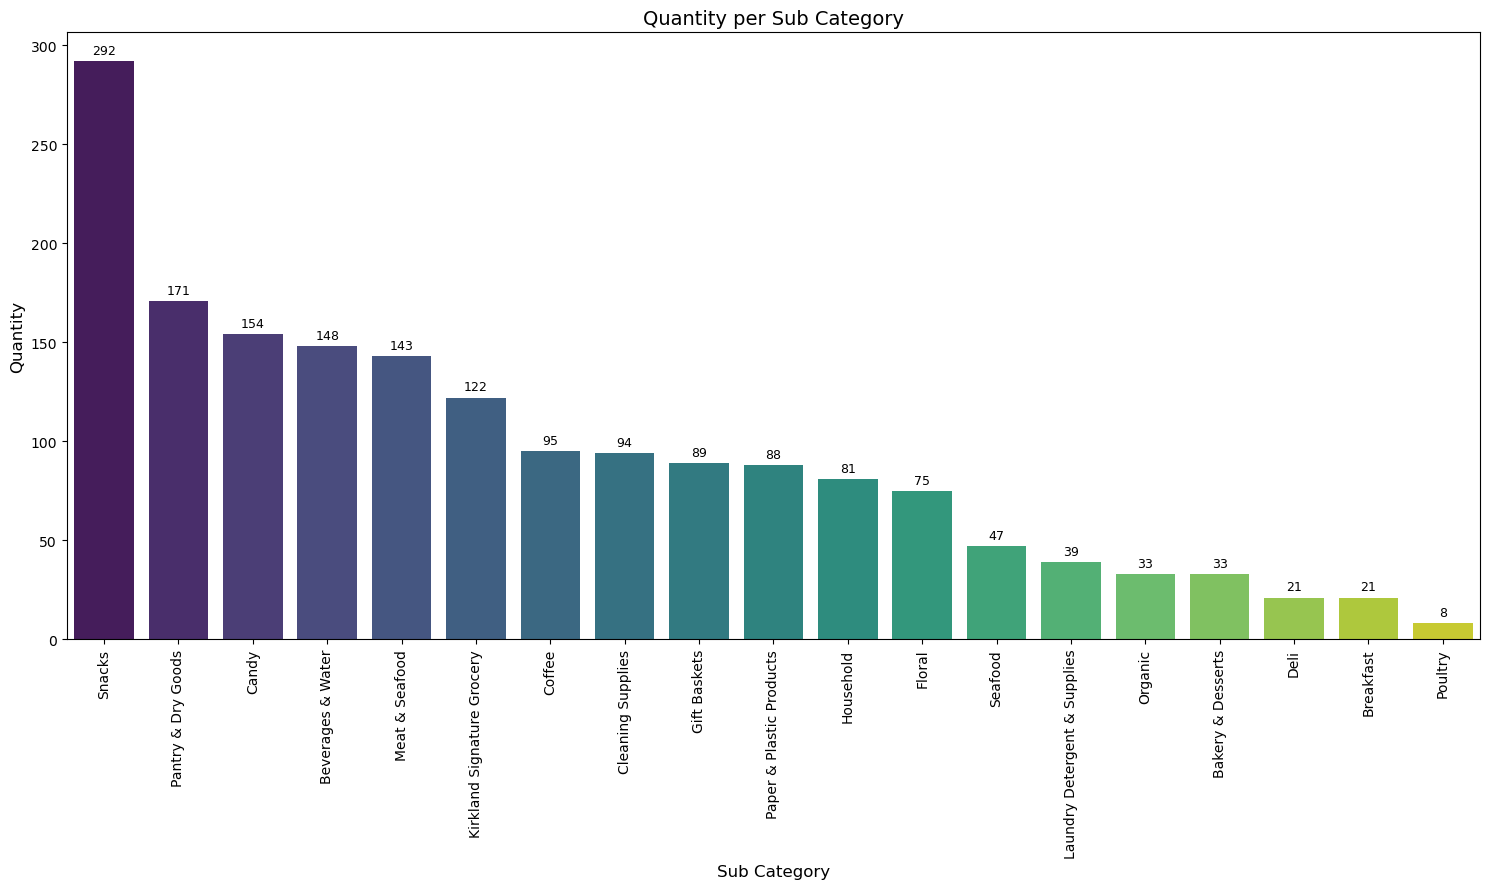

In [191]:
#quantity per subcategory
total_per_subcategory = df.groupby('Sub Category')['Price'].count().reset_index()

total_per_subcategory = total_per_subcategory.rename(columns={'Price': 'Quantity'})

sorted_subcategories_by_quantity = total_per_subcategory.sort_values('Quantity', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(data=sorted_subcategories_by_quantity, x='Sub Category', y='Quantity', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity per Sub Category', fontsize=14)

plt.tight_layout()
plt.show()

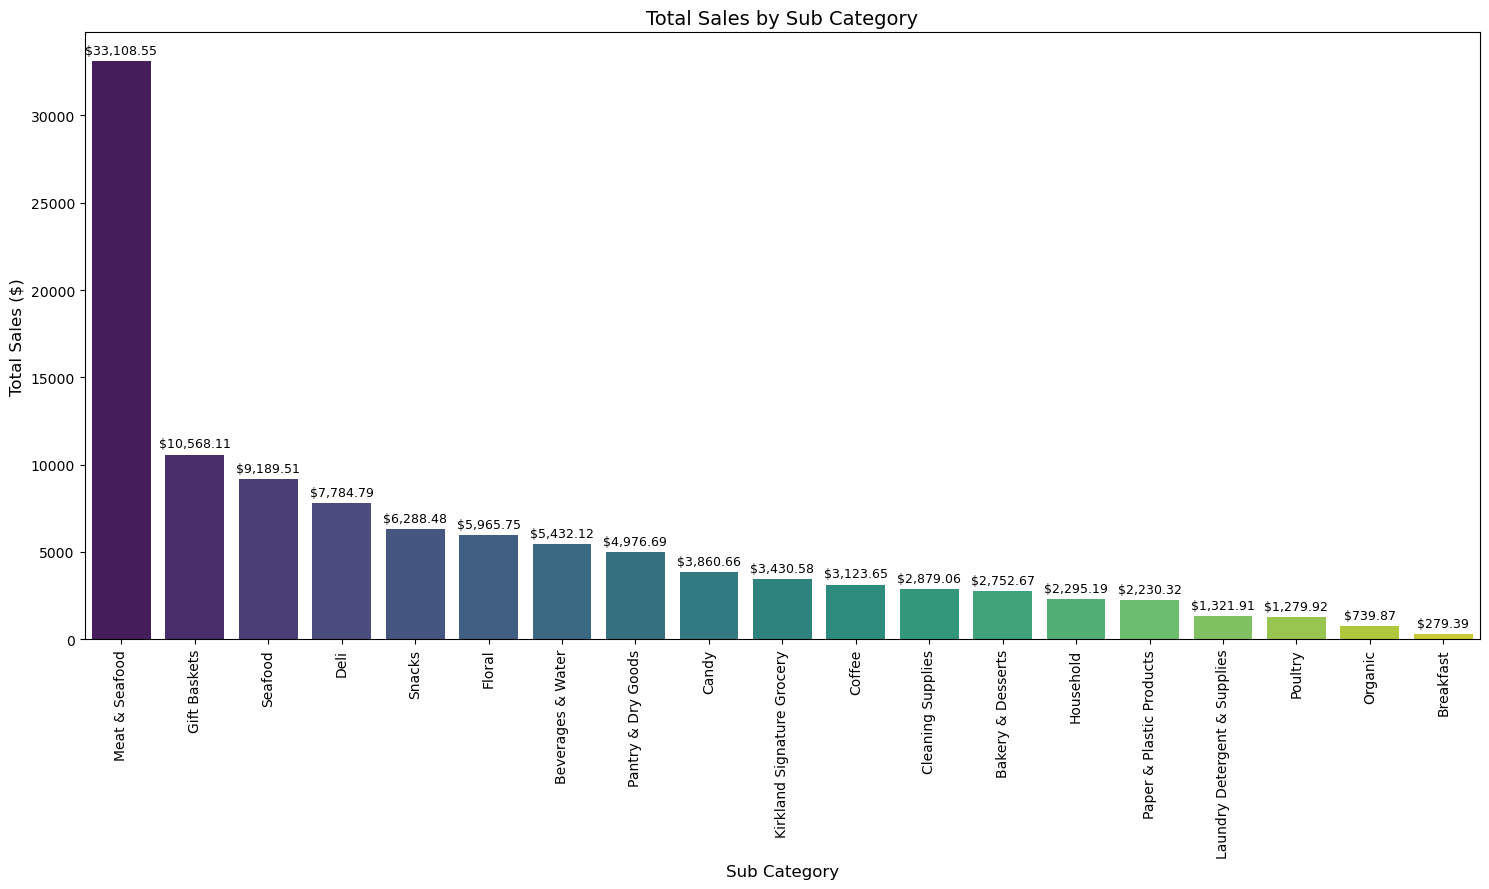

In [192]:
#total sales by subcategory
total_sales_per_subcategory = df.groupby('Sub Category')['Price'].sum().reset_index()

sorted_subcategories_by_sales = total_sales_per_subcategory.sort_values('Price', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(data=sorted_subcategories_by_sales, x='Sub Category', y='Price', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'${bar.get_height():,.2f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Total Sales by Sub Category', fontsize=14)

plt.tight_layout()
plt.show()

In [193]:
# Count the number of non-NaN values in the 'Rating' column for each category
counts_by_category = df.groupby('Sub Category')['Rating'].apply(lambda x: x.count())

# Sort the counts for better visualization
sorted_counts = counts_by_category.sort_values(ascending=False)

print(sorted_counts)

Sub Category
Meat & Seafood                  129
Gift Baskets                     75
Floral                           56
Pantry & Dry Goods               44
Seafood                          41
Snacks                           37
Cleaning Supplies                37
Coffee                           37
Bakery & Desserts                29
Beverages & Water                24
Deli                             20
Kirkland Signature Grocery       19
Candy                            19
Laundry Detergent & Supplies     16
Paper & Plastic Products         14
Organic                           8
Poultry                           8
Breakfast                         2
Household                         0
Name: Rating, dtype: int64


### Remarque :
the Household category doesn't have a non NaN value, We don't know the value of it rating !

In [194]:
# Replace Household missing values with default rating
default_rating = 2.5  
df.loc[df['Sub Category'] == 'Household', 'Rating'] = default_rating
# Calculer la moyenne de chaque catégorie (sauf 'household')
category_means = df[df['Sub Category'] != 'household'].groupby('Sub Category')['Rating'].mean()

# Remplir les valeurs nulles avec la moyenne respective de chaque catégorie (sauf 'household')
df['Rating'] = df.apply(lambda row: category_means[row['Sub Category']] if pd.isnull(row['Rating']) and row['Sub Category'] != 'household' else row['Rating'], axis=1)
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,56.99,No Discount,4.300000,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,159.99,No Discount,5.000000,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,44.99,No Discount,4.100000,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,39.99,No Discount,4.700000,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,59.99,No Discount,4.500000,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
...,...,...,...,...,...,...,...,...
1752,Snacks,23.99,No Discount,4.383784,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,49.99,No Discount,4.383784,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,22.99,No Discount,4.383784,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,17.49,No Discount,4.383784,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


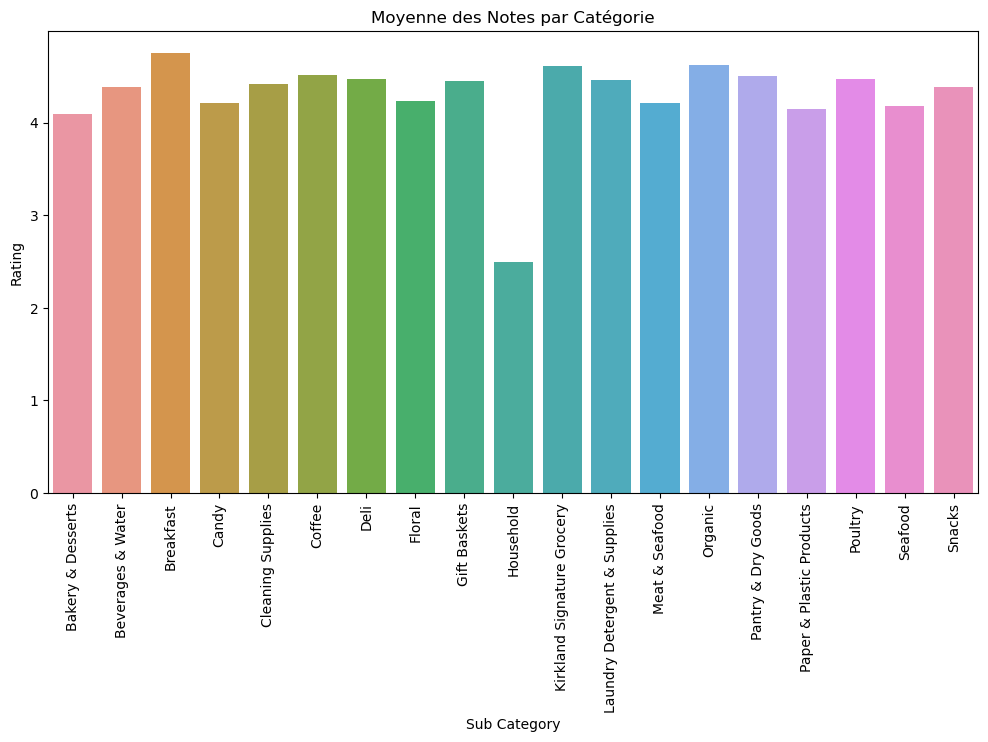

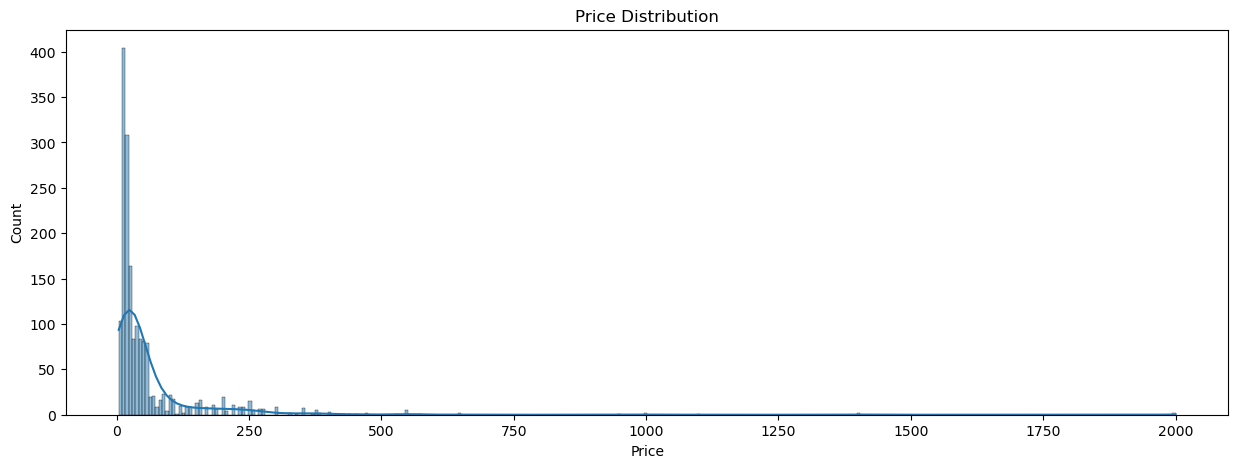

In [195]:
# Diagramme à barres pour la moyenne des notes par catégorie
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub Category', y='Rating', data=df, ci=None)
plt.title('Moyenne des Notes par Catégorie')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Price", kde=True)
plt.title("Price Distribution")
plt.show()

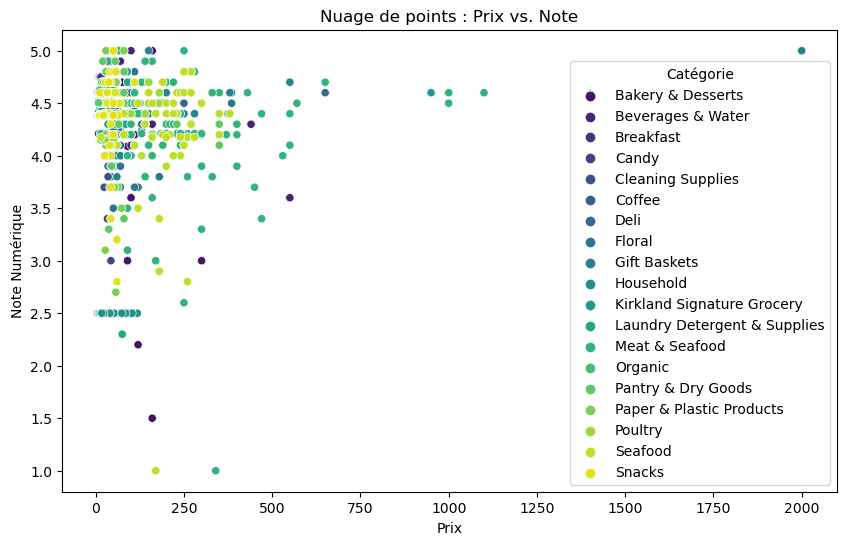

In [196]:
# Nuage de points entre le prix et la note
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Rating', hue='Sub Category', palette='viridis')
plt.title('Nuage de points : Prix vs. Note')
plt.xlabel('Prix')
plt.ylabel('Note Numérique')
plt.legend(title='Catégorie')
plt.show()

In [197]:
df['Discount'].unique()

array(['No Discount', 'After $30 OFF', 'After $5 OFF',
       'This item is not returnable.', 'After $20 OFF', 'After $4.50 OFF',
       'After $4 OFF', 'After $2.80 OFF', 'After $8 OFF',
       'After $3.60 OFF', 'After $3 OFF', 'After $1.50 OFF',
       'After $3.30 OFF', 'After $6 OFF', 'After $2.40 OFF',
       'After $2.20 OFF', 'After $12 OFF', 'After $3.10 OFF',
       'After $5.60 OFF', 'After $2.70 OFF', 'After $10 OFF',
       'After $9.30 OFF', 'After $50 OFF', 'After $2.50 OFF',
       'After $70 OFF', 'After $60 OFF', 'After $40 - $80 OFF',
       'After $40 - $70 OFF', 'After $40 OFF', 'After $80 OFF',
       'After $3.50 OFF', 'Limit 1 Per Member', 'Limit 5 Per Member',
       'After $6.50 OFF', 'After $3.80 OFF', 'After $2.60 OFF',
       'After $7 OFF', 'After $4.10 OFF', 'After $2 OFF',
       'After $2.30 OFF'], dtype=object)

In [198]:
# Remplacer toutes les occurrences de 'Discount' différent de 'No Discount' par 'Discounted'
df.loc[df['Discount'] != 'No Discount', 'Discount'] = 'Discounted'
# Verification exemple
df[df['Sub Category']== 'Breakfast'].head()

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
181,Breakfast,10.49,Discounted,4.75,"MadeGood Granola Minis, Variety Pack, 0.85 oz,...",$,Granola Mini Bites Variety pack: 12-Chocolat...,Great for on-the-go\nContains nutrients from v...
182,Breakfast,9.69,No Discount,4.75,"Post, Honey Bunches of Oats with Almonds Cerea...",$,Sweetened Cereal with Oats and Honey Kosher ...,Honey Bunches of Oats with Almonds\nWith Grano...
183,Breakfast,8.19,Discounted,4.75,"General Mills, Cheerios Cereal, Honey Nut, 27....",$,Honey Nut Cheerios Kosher Gluten Free 27...,Sweetened whole grain oat cereal with real hon...
184,Breakfast,9.99,No Discount,4.75,"Kirkland Signature Whole Grain Rolled Oats, 10...",$,Kosher Whole Grain Rolled Oats Resealable ...,Net Weight 10 LBS
185,Breakfast,28.99,Discounted,4.80,NuTrail Keto Nut Granola Blueberry Cinnamon 2-...,$,2-pack (22 oz each) Keto 3g Net Carbs,Who is NuTrail?At NuTrail™ our mission is to m...


## Text Pre-processing
Create a function <b>'preprocess_text'</b>, which will contain methods to remove different types of noise from the words in columns `Feature` and `Product Description`.

In [199]:
def preprocess_text(text):
    # Check if text is NaN, return an empty string if it is
    if isinstance(text, float) and math.isnan(text):
        return ''
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenization and Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return ' '.join(lemmatized_text)
 
# Apply to dataset and visualize the result with an example
df['Product Description'] = df['Product Description'].apply(preprocess_text)
df['Feature'] = df['Feature'].apply(preprocess_text)
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,56.99,No Discount,4.300000,"David’s Cookies Mile High Peanut Butter Cake, ...",$,10 peanut butter cake certified kosher ou 14 s...,cake dessert epicure die top selling cake fudg...
1,Bakery & Desserts,159.99,No Discount,5.000000,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,spiced carrot cake cream cheese frosting silk ...,due perishable nature item order ship weekend ...
2,Bakery & Desserts,44.99,No Discount,4.100000,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count individually wrapped made imported f...,moist buttery sponge cake traditional european...
3,Bakery & Desserts,39.99,No Discount,4.700000,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,butter pecan meltaways 32 oz 2 pack preservati...,delectable butter pecan meltaways perfect snac...
4,Bakery & Desserts,59.99,No Discount,4.500000,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,10 four layer chocolate cake certified kosher ...,cake dessert epicure die ultimate chocolate lo...
...,...,...,...,...,...,...,...,...
1752,Snacks,23.99,No Discount,4.383784,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,cocktail pepperoni smoked sausage stick 3 oz b...,cocktail pepperonismoked sausage sticks3 oz ba...
1753,Snacks,49.99,No Discount,4.383784,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,made real cheese,64 count2 1 oz bag
1754,Snacks,22.99,No Discount,4.383784,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,chile limón mix variety pack 30 ct net weight ...,8 doritos dinamita chile limón flavored rolled...
1755,Snacks,17.49,No Discount,4.383784,"Fruit Roll-Ups, Variety Pack, 72-count",$,variety pack 1 box 72 roll flavored natural fl...,fruit flavored snack variety includes strawber...


In [200]:
df.isnull().sum()

Sub Category           0
Price                  0
Discount               0
Rating                 0
Title                  0
Currency               2
Feature                0
Product Description    0
dtype: int64

# Classification Model

In [201]:
# Sélectionner les caractéristiques et la variable cible
X = df.drop(["Discount","Currency"], axis=1) # Exclure les colonnes non nécessaires
y = df.Discount

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un preprocessor pour traiter les variables catégorielles
preprocessor = make_column_transformer(
    # Appliquer OneHotEncoder aux colonnes de type 'object' et ignorer les valeurs inconnues
    (OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include=['object']).columns),
    # Ne pas effectuer de transformation sur les autres colonnes ('passthrough')
    remainder='passthrough'
)

# Créer et entraîner un modèle de classification (Random Forest )
classifier = RandomForestClassifier(random_state=42)
classifier.fit(preprocessor.fit_transform(X_train), y_train)

# Faire des prédictions sur l'ensemble de test
predictions = classifier.predict(preprocessor.transform(X_test))

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)


print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)

Accuracy: 0.9316239316239316

Confusion Matrix:
[[  2  24]
 [  0 325]]
